## Ingeniería de características
La **ingeniería de características** es mucho más que un simple paso en el preprocesamiento de datos; es el arte y la ciencia de transformar datos brutos en información útil y significativa para los algoritmos de **machine learning**. A menudo, el éxito de un modelo depende en gran medida de la calidad y pertinencia de las características utilizadas, superando incluso la elección del modelo o el ajuste de hiperparámetros. Este proceso es iterativo y requiere una comprensión profunda tanto de la naturaleza de los datos como del problema a resolver.


#### 1. Tipos de características

Los datos pueden presentarse en diversos formatos, y conocer el tipo de cada característica es esencial para aplicar las técnicas adecuadas:

##### **a) Características continuas**

- **Definición:** Variables que pueden asumir un rango infinito o muy amplio de valores numéricos dentro de un intervalo.
- **Ejemplos:**  
  - Temperatura en grados Celsius.
  - Brillo de píxeles en imágenes.
  - Tiempo en segundos.
- **Consideraciones:**  
  - Estas variables pueden requerir escalado o normalización para evitar que magnitudes muy dispares afecten el entrenamiento de modelos basados en distancia (por ejemplo, KNN o regresiones lineales).

##### **b) Características categóricas**

- **Definición:** Variables que representan categorías o grupos discretos.
- **Ejemplos:**  
  - Color de un producto (rojo, azul, verde).
  - Tipo de trabajo (docente, ingeniero, médico).
  - País de residencia (EE.UU., España, Perú).
- **Consideraciones:**  
  - La conversión de estas variables a un formato numérico es imprescindible para la mayoría de los modelos. Además, es importante evaluar la cardinalidad (cantidad de categorías) para evitar problemas como la explosión de dimensiones en técnicas como One-Hot Encoding.
  
> **Nota adicional:** En algunos casos se consideran variables ordinales, que son categóricas pero poseen un orden natural (por ejemplo, niveles de satisfacción: bajo, medio, alto).

#### 2. Técnicas de ingeniería de características

La transformación y enriquecimiento de los datos se puede lograr mediante diversas técnicas, cada una con sus ventajas y desafíos. A continuación, se profundiza en algunas de las más relevantes:

##### **a) Codificación de características categóricas**

Debido a que los algoritmos de machine learning requieren entradas numéricas, es esencial transformar las variables categóricas. Entre las técnicas más utilizadas se encuentran:

- **One-Hot encoding:**  
  - **Funcionamiento:** Crea una columna binaria para cada categoría presente.  
  - **Ejemplo:** Una variable "Color" con valores {Rojo, Azul, Verde} se transforma en tres columnas: `Color_Rojo`, `Color_Azul` y `Color_Verde`.  
  - **Ventajas y desventajas:**  
    - *Ventaja:* No asume un orden implícito entre categorías.  
    - *Desventaja:* Puede generar un gran número de columnas si la variable tiene alta cardinalidad.
  
- **Label encoding:**  
  - **Funcionamiento:** Asigna un entero a cada categoría (por ejemplo, Rojo → 0, Azul → 1, Verde → 2).  
  - **Consideración importante:** Útil cuando las categorías tienen un orden natural, pero puede inducir relaciones espurias cuando no existe orden.
  
- **Target (Mean) encoding:**  
  - **Funcionamiento:** Reemplaza cada categoría por el valor medio de la variable objetivo para ese grupo.  
  - **Precaución:** Se debe evitar el sobreajuste y la fuga de datos (target leakage) mediante técnicas de validación cruzada durante la codificación.
  
- **Binary encoding:**  
  - **Funcionamiento:** Convierte las categorías en representaciones binarias comprimidas, reduciendo la dimensionalidad en comparación con One-Hot Encoding.  
  - **Aplicación:** Es particularmente útil para variables con alta cardinalidad.

- **Otras técnicas:**  
  - *Frequency Encoding:* Sustituye cada categoría por su frecuencia de aparición en los datos, lo que puede ser útil cuando la prevalencia de una categoría es relevante para la predicción.


##### **b) Escalado y normalización de características numéricas**

Los algoritmos que utilizan métodos basados en distancias o que se basan en gradientes (como la regresión logística o las redes neuronales) suelen requerir datos en escalas similares para garantizar una convergencia adecuada:

- **Min-Max Scaling:**  
  - **Fórmula:**  
    $$
    X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
    $$
  - **Resultado:** Escala las variables a un rango específico, usualmente `[0, 1]`.
  
- **Z-Score normalization (Estandarización):**  
  - **Fórmula:**  
    $$
    X' = \frac{X - \mu}{\sigma}
    $$
  - **Resultado:** Transforma los datos para que tengan media 0 y desviación estándar 1.
  
- **Log Transformation:**  
  - **Uso:** Se aplica en variables con distribución sesgada para aproximar una distribución normal, lo que puede mejorar el desempeño de ciertos modelos.
  
- **Robust scaling:**  
  - **Característica:** Utiliza la mediana y los cuartiles, siendo menos sensible a valores atípicos.


##### **c) Generación de nuevas características**

La creación de nuevas variables a partir de las existentes puede revelar relaciones ocultas en los datos:

- **Interacciones y transformaciones no lineales:**  
  - **Ejemplos:**  
    - Producto o división de variables: $\text{feature}_1 \times \text{feature}_2$ o $\frac{\text{feature}_1}{\text{feature}_2}$.  
    - Transformaciones no lineales: $\text{feature}_1^2$, $\sqrt{\text{feature}_2}$ o funciones logarítmicas.
  
- **Características temporales:**  
  - **Extracción de información:** A partir de fechas se pueden extraer el día, mes, año, hora, o incluso identificar estacionalidades y tendencias.
  - **Ejemplo:** En series de tiempo, calcular la diferencia en días o el promedio móvil puede ser muy útil.
  
- **Reducción de dimensionalidad:**  
  - **PCA (Análisis de componentes principales):** Permite transformar las variables originales en un conjunto menor de componentes que explican la mayor parte de la varianza.
  - **Otros métodos:** Técnicas como t-SNE o UMAP se utilizan para la visualización y análisis exploratorio, aunque no necesariamente para entrenamiento.
  
- **Características derivadas con modelos:**  
  - **Autoencoders:** Redes neuronales entrenadas para aprender una representación comprimida y eficiente de los datos, útiles para descubrir estructuras latentes.
  
- **Ingeniería automática de características:**  
  - **Herramientas como Featuretools:** Automatizan la generación de características a partir de relaciones entre tablas y datos temporales, facilitando el descubrimiento de patrones complejos.


##### **d) Manejo de datos faltantes**

Los valores ausentes pueden degradar la calidad del modelo, por lo que su tratamiento es fundamental:

- **Eliminación de registros:**  
  - Útil cuando la proporción de datos faltantes es mínima y no se pierde información valiosa.
  
- **Imputación de valores:**  
  - **Métodos simples:** Reemplazo por la media, mediana o moda.  
  - **Métodos avanzados:**  
    - Imputación basada en modelos, como KNN Imputation o técnicas de regresión.  
    - Imputación múltiple, que genera varias estimaciones para capturar la incertidumbre en los datos faltantes.
  
- **Uso de indicadores de faltantes:**  
  - A veces, la ausencia de datos en sí puede ser informativa. Se pueden crear variables binarias que indiquen si un valor estaba ausente.

##### **e) Selección de características**

No todas las variables disponibles aportan valor al modelo. La selección de características ayuda a enfocarse en las variables más relevantes, mejorando la eficiencia y reduciendo el riesgo de sobreajuste:

- **Métodos basados en filtros:**  
  - Se utilizan métricas estadísticas para evaluar la relación entre cada característica y la variable objetivo (por ejemplo, coeficientes de correlación, pruebas Chi-cuadrado o ANOVA).
  
- **Métodos basados en wrappers:**  
  - **Recursive feature elimination (RFE):** Iterativamente elimina las características menos importantes evaluando el rendimiento del modelo.
  - **Búsqueda con validación cruzada:** Se evalúa el conjunto óptimo de características mediante técnicas de validación.
  
- **Métodos basados en modelos (Embedded):**  
  - Algoritmos como LASSO (regularización L1) o modelos basados en árboles (Random Forests, Gradient Boosting) pueden asignar pesos o importancias a cada variable durante el entrenamiento, facilitando la selección.



#### 3. Algoritmos y herramientas utilizados en ingeniería de características

La aplicación de algoritmos en el proceso de ingeniería de características no solo se limita a la selección y transformación, sino que también puede ayudar a extraer patrones complejos:

- **Árboles de decisión y ensambles:**  
  - Además de servir para la predicción, estos algoritmos permiten identificar automáticamente la importancia relativa de las características. Técnicas como Random Forests o Gradient Boosting son ampliamente utilizadas para este propósito.
  
- **Análisis de componentes principales (PCA):**  
  - Herramienta estadística que ayuda a reducir la dimensionalidad, eliminando la redundancia en los datos y mejorando la eficiencia computacional.
  
- **Autoencoders:**  
  - Redes neuronales diseñadas para aprender representaciones compactas de datos, útiles en escenarios de reducción de ruido y detección de anomalías.
  
- **Embeddings y técnicas de representación:**  
  - En el procesamiento de lenguaje natural, técnicas como Word2Vec, FastText o TF-IDF permiten convertir texto en vectores numéricos de forma que se capturen las relaciones semánticas.
  
- **Ingeniería automática de características:**  
  - Herramientas como **Featuretools** permiten automatizar la generación y combinación de características, lo que es especialmente útil cuando se trabaja con bases de datos relacionales y series temporales.



#### **Variables categóricas**

Como ejemplo, utilizaremos el conjunto de datos de ingresos de adultos en los Estados Unidos, derivado de la base de datos del censo de 1994. La tarea de este conjunto de datos es predecir si un trabajador tiene un ingreso **superior a $50,000$** o **inferior o igual a $50,000$**. Las características en este conjunto de datos incluyen la edad de los trabajadores, su situación laboral (autónomos, empleados de la industria privada, empleados del gobierno, etc.), su nivel educativo, su género, sus horas de trabajo por semana, su ocupación y más.


##### **Tabla 1: Información de empleados**
| age | workclass         | education    | gender | hours-per-week | occupation        | income |
|-----|------------------|-------------|--------|---------------|------------------|--------|
| 39  | State-gov        | Bachelors   | Male   | 40            | Adm-clerical     | <=50K  |
| 50  | Self-emp-not-inc | Bachelors   | Male   | 13            | Exec-managerial  | <=50K  |
| 38  | Private          | HS-grad     | Male   | 40            | Handlers-cleaners| <=50K  |
| 53  | Private          | 11th        | Male   | 40            | Handlers-cleaners| <=50K  |
| 28  | Private          | Bachelors   | Female | 40            | Prof-specialty   | <=50K  |
| 37  | Private          | Masters     | Female | 40            | Exec-managerial  | <=50K  |
| 49  | Private          | 9th         | Female | 16            | Other-service    | <=50K  |
| 52  | Self-emp-not-inc | HS-grad     | Male   | 45            | Exec-managerial  | >50K   |
| 31  | Private          | Masters     | Female | 50            | Prof-specialty   | >50K   |
| 42  | Private          | Bachelors   | Male   | 40            | Exec-managerial  | >50K   |
| 37  | Private          | Some-college| Male   | 80            | Exec-managerial  | >50K   |


La tarea se plantea como un **problema de clasificación** con dos clases:  
- **`<=50K`** → Personas con ingresos inferiores o iguales a $50,000$.  
- **`>50K`** → Personas con ingresos superiores a $50,000$.  

También sería posible predecir el ingreso exacto y tratar el problema como una **tarea de regresión**. Sin embargo, esto sería mucho más complejo, y la división en **$50,000** es una frontera útil para analizar.

En este conjunto de datos, las características `age` y `hours-per-week` son **variables continuas**, que sabemos cómo tratar. Sin embargo, las características **`workclass`**, **`education`**, **`gender`** y **`occupation`** son **variables categóricas**.  

Las **variables categóricas** provienen de una lista fija de valores posibles, a diferencia de un rango numérico. Además, denotan una propiedad **cualitativa**, en lugar de representar una cantidad.


#### **One-Hot encoding (variables dummy)**

La forma más común de representar **variables categóricas** es utilizando **one-hot encoding** (también conocida como **one-out-of-N encoding** o **variables dummy**).  

La idea detrás de esta técnica es **reemplazar una variable categórica con una o más características nuevas** que pueden tomar valores de **0 o 1**. Estos valores son especialmente útiles en modelos de clasificación binaria y en la mayoría de los algoritmos de **machine learning**, como los implementados en `scikit-learn`.  

Podemos representar cualquier cantidad de categorías introduciendo una **nueva característica por cada categoría posible**, como se muestra a continuación.

Supongamos que la variable **`workclass`** tiene los siguientes posibles valores:

- `Government Employee`
- `Private Employee`
- `Self Employed`
- `Self Employed Incorporated`

Para codificar estos cuatro valores, creamos **cuatro nuevas características** llamadas:  
**`Government Employee`**, **`Private Employee`**, **`Self Employed`** y **`Self Employed Incorporated`**.  

Cada una de estas nuevas características toma el valor `1` si el valor original de **`workclass`** coincide con la categoría correspondiente y `0` en caso contrario. Es decir, **exactamente una de estas cuatro características será 1 para cada punto de datos**.  

Esta es la razón por la cual esta técnica se denomina **one-hot encoding** o **one-out-of-N encoding**.

Después de aplicar esta codificación, la variable **original** `workclass` es eliminada y solo se mantienen las nuevas variables **0-1** cuando se entrenan modelos de **machine learning**.

##### **Tabla 2: Codificación One-Hot de `workclass`**
| workclass                  | Government Employee | Private Employee | Self Employed | Self Employed Incorporated |
|----------------------------|--------------------|------------------|--------------|----------------------------|
| Government Employee        | 1                  | 0                | 0            | 0                          |
| Private Employee           | 0                  | 1                | 0            | 0                          |
| Self Employed              | 0                  | 0                | 1            | 0                          |
| Self Employed Incorporated | 0                  | 0                | 0            | 1                          |



Hay dos formas de convertir los datos a una codificación **one-hot** para variables categóricas: utilizando **`pandas`** o **`scikit-learn`**.  

Usar **`pandas`** es un poco más sencillo, por lo que seguiremos este enfoque.  

Primero, cargamos los datos desde un archivo de valores separados por comas (**CSV**) utilizando **`pandas`**:


In [6]:
import pandas as pd
datos = pd.read_csv("adult.data", header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                          'income'])
# Seleccionamos algunas columnas
datos = datos[['age', 'workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']]
display(datos.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### **Comprobación de datos categóricos codificados como cadenas**

Después de leer un conjunto de datos como este, es recomendable verificar si una columna contiene realmente datos **categóricos significativos**.  

Al trabajar con datos ingresados manualmente (por ejemplo, por usuarios en un sitio web), puede que no exista un conjunto fijo de categorías. Además, **diferencias en la ortografía y el uso de mayúsculas** pueden requerir preprocesamiento.  

Por ejemplo, es posible que algunas personas especifiquen el género como `"male"`, mientras que otras lo indiquen como `"man"`. En este caso, podría ser conveniente representar ambas entradas con la misma categoría.  

Una forma efectiva de verificar el contenido de una columna es utilizando la función **`value_counts()`** de una **Serie de `pandas`**, que nos muestra los valores únicos y la frecuencia con la que aparecen:



In [8]:
print(datos.gender.value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


Hay una manera muy sencilla de **codificar datos categóricos** en **`pandas`**, utilizando la función **`get_dummies()`**.  

Esta función **transforma automáticamente** todas las columnas que tienen tipo **`object`** (cadenas de texto) o son de tipo **categórico** (un tipo de dato especial en `pandas`, que aún no hemos explorado).



In [10]:
print("Caracteristicas originales:\n", list(datos.columns), "\n")
datos_dummies = pd.get_dummies(datos)
print("Caracteristicas despues de  get_dummies:\n", list(datos_dummies.columns))

Caracteristicas originales:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Caracteristicas despues de  get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'oc

In [11]:
datos_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


Ahora podemos utilizar el atributo **`values`** para convertir el **DataFrame** `datos_dummies` en una matriz de **NumPy** y luego entrenarlo en un modelo de **machine learning**.  

Es importante asegurarse de **separar la variable objetivo** (que ahora está codificada en dos columnas **`income`**) de los datos antes de entrenar el modelo. **Incluir la variable de salida o alguna propiedad derivada de ella en las características del modelo es un error común en la creación de modelos supervisados de machine learning**.

**Importante**: La indexación de columnas en **`pandas`** **incluye** el límite superior del rango, por lo que `age:occupation_Transport-moving` **incluye** `occupation_Transport-moving`.  

Esto **es diferente** a un **slicing** en una matriz de **NumPy**, donde el límite superior del rango **no está incluido**. Por ejemplo, en NumPy:

```python
np.arange(11)[0:10]
```
No incluye la entrada con el índice `10`.


In [13]:
# Seleccionar características (corrigiendo el error de ix)
caracteristica = datos_dummies.loc[:, 'age':'occupation_ Transport-moving']

# Extraemos matrices NumPy
X = caracteristica.values
y = datos_dummies['income_ >50K'].values

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))


X.shape: (32561, 44) y.shape: (32561,)


Ahora los datos están representados de una manera que scikit-learn puede funcionar,  podemos proceder como de costumbre:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Dividimos los datos en conjunto de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0, test_size=0.2)

# Escalamos los datos para mejorar la estabilidad numérica
scaler = StandardScaler()
X_entrenamiento = scaler.fit_transform(X_entrenamiento)
X_prueba = scaler.transform(X_prueba)

# Definimos el modelo de regresión logística con más iteraciones y un solver adecuado
logreg = LogisticRegression(solver='saga', max_iter=1000, random_state=0)

# Entrenamos el modelo
logreg.fit(X_entrenamiento, y_entrenamiento)

# Evaluamos el modelo
puntuacion = logreg.score(X_prueba, y_prueba)
print("Puntuación del modelo en el conjunto de prueba: {:.2f}".format(puntuacion))


Puntuación del modelo en el conjunto de prueba: 0.81


Imaginemos que tenemos los conjuntos de **entrenamiento** y **prueba** almacenados en **dos DataFrames diferentes**.  

Si el valor **`Private Employee`**, correspondiente a la característica **`workclass`**, no aparece en el conjunto de prueba, **`pandas`** asumirá que solo existen **tres valores posibles** para esta característica y creará únicamente **tres nuevas variables dummy** en lugar de cuatro.
Como resultado, nuestros conjuntos de **entrenamiento** y **prueba** tendrán un **número diferente de características**, lo que impedirá aplicar el modelo entrenado correctamente al conjunto de prueba.

**Peor aún**, si la característica **`workclass`** contiene los valores **`Government Employee`** y **`Private Employee`** en el conjunto de **entrenamiento**, pero **`Self Employed`** y **`Self Employed Incorporated`** en el conjunto de **prueba**, **pandas** creará dos variables **dummy en ambos conjuntos**.  

Sin embargo, aunque el número de características sea el mismo, **su significado será completamente diferente**. La columna que representa **`Government Employee`** en el conjunto de **entrenamiento** podría representar **`Self Employed`** en el conjunto de **prueba**.

**Problema grave en machine learning**  
Si construimos un **modelo de machine learning** con estos datos, su desempeño será **muy deficiente**. El modelo asumirá que las columnas representan las mismas categorías (porque están en la misma posición), cuando en realidad contienen información completamente diferente.

#### **Solución**
Para evitar este problema, podemos aplicar `get_dummies` de dos maneras:  

- **Llamar a `get_dummies` en un único `DataFrame`** que contenga **tanto los datos de entrenamiento como los de prueba**.
- **Asegurarnos de que los nombres de las columnas sean los mismos** en ambos conjuntos después de aplicar `get_dummies`, garantizando que mantengan la misma semántica.



#### **Los números también pueden representar variables categóricas**

En el conjunto de datos de adultos, las **variables categóricas** se codificaron como **cadenas**. Esto tiene ventajas y desventajas:  

- Por un lado, **marcar una variable como categórica** usando cadenas evita confusiones.
- Por otro lado, **abre la posibilidad de errores ortográficos** y de inconsistencias en la escritura.  

Sin embargo, en muchas situaciones, ya sea para **optimizar el almacenamiento** o debido a la forma en que se recopilan los datos, las **variables categóricas se codifican como números enteros**.

##### **Ejemplo: Datos del censo**

Imaginemos que los datos del censo en el conjunto de datos **`adult`** se recopilaron mediante un **cuestionario**, y las respuestas para **`workclass`** fueron registradas de la siguiente manera:

- `0` → Primera casilla marcada  
- `1` → Segunda casilla marcada  
- `2` → Tercera casilla marcada  
- ...y así sucesivamente.

Como resultado, en lugar de contener valores de tipo **cadena** como `"Private"`, la columna ahora contendrá **números enteros** del `0` al `8`.  

**Problema**: A simple vista, no es evidente si esta variable debe tratarse como **continua** o **categórica**. Sin embargo, al saber que estos números representan el estado de empleo, es claro que son **categorías discretas** y no deben ser modeladas como una única variable continua.

##### **¿Cuándo una variable entera debe tratarse como categórica?**
Las **características categóricas** a menudo se codifican con **números enteros**. Sin embargo, el hecho de que sean **números** no significa que deban tratarse necesariamente como **variables continuas**.  

**Reglas para decidir cómo tratarlas**:  

- **Si no hay un orden lógico entre los valores** → Se deben tratar como **categóricas** y codificarlas con **one-hot encoding**.  
   - Ejemplo: `"workclass"` (`0` = `Private Employee`, `1` = `Government Employee`, etc.).  
   - No hay una relación de orden entre `"Private Employee"` y `"Government Employee"`, por lo que **no deben tratarse como continuas**.  

- **Si los valores representan una escala ordinal** → Dependerá de la tarea y del algoritmo de **machine learning**.  
   - Ejemplo: **Clasificaciones de cinco estrellas** (`1` a `5`).  
   - Dependiendo del contexto, **puede ser mejor tratarlas como continuas o como categóricas**.

##### **`pandas.get_dummies()` vs `OneHotEncoder`**
- La función **`get_dummies()` de pandas** trata **todos los números como continuos**, por lo que **no creará variables dummy** para columnas numéricas.
- Para evitar este problema, puedes utilizar el **`OneHotEncoder` de `scikit-learn`**, que permite especificar **qué variables son continuas y cuáles son categóricas**.
- Otra opción es **convertir las columnas numéricas en cadenas** antes de aplicar `get_dummies()`.


##### **Ejemplo en Python**
Para ilustrar esto, creamos un **DataFrame** con dos columnas:  

- **Una columna con valores categóricos como cadenas**.
- **Otra con valores categóricos codificados como enteros**.  

```python
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Creamos un DataFrame con una columna categórica como string y otra como entero
df = pd.DataFrame({
    'workclass_str': ['Private', 'Self Employed', 'Government'],
    'workclass_int': [0, 1, 2]  # Codificación numérica
})

# Aplicamos get_dummies en la columna string
df_dummies = pd.get_dummies(df, columns=['workclass_str'])

# Usamos OneHotEncoder de sklearn para la columna numérica
encoder = OneHotEncoder(sparse=False)
encoded_values = encoder.fit_transform(df[['workclass_int']])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['workclass_int']))

# Concatenamos los resultados
final_df = pd.concat([df_dummies, encoded_df], axis=1)

# Mostramos el resultado
print(final_df)
```


#### Código

In [19]:
# creamos un DataFrame con una característica entera y una característica de cadena categórica

demo_df = pd.DataFrame({'Caracteristica entera': [0, 1, 2, 1],
                        'Caracteristica categorica': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Caracteristica entera,Caracteristica categorica
0,0,socks
1,1,fox
2,2,socks
3,1,box


El uso de `get_dummies` solo codificará las característica de cadena y no cambiará la característica de entero, como puedes ver:

In [21]:
pd.get_dummies(demo_df)

,Caracteristica entera,Caracteristica categorica_box,Caracteristica categorica_fox,Caracteristica categorica_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


Si queremos codificar **también la columna numérica** (`Caracteristica entera`), primero debemos convertirla en tipo `str` para que `get_dummies()` la reconozca como categórica.

In [23]:
demo_df['Caracteristica entera'] = demo_df['Caracteristica entera'].astype(str)
pd.get_dummies(demo_df, columns=['Caracteristica entera', 'Caracteristica categorica'])

,Caracteristica entera_0,Caracteristica entera_1,Caracteristica entera_2,Caracteristica categorica_box,Caracteristica categorica_fox,Caracteristica categorica_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


Ahora ambas columnas (`Caracteristica entera` y `Caracteristica categorica`) han sido codificadas en variables dummy.

##### Uso de `OneHotEncoder` de `sklearn`**

Otra forma de realizar la codificación one-hot es mediante OneHotEncoder de scikit-learn:

In [26]:
from sklearn.preprocessing import OneHotEncoder
demo_df['Caracteristica entera'] = demo_df['Caracteristica entera'].astype(str)
encoder = OneHotEncoder(sparse_output=False)
encoded_values = encoder.fit_transform(demo_df[['Caracteristica entera', 'Caracteristica categorica']])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Caracteristica entera', 'Caracteristica categorica']))

print(encoded_df)

   Caracteristica entera_0  Caracteristica entera_1  Caracteristica entera_2  \
0                      1.0                      0.0                      0.0   
1                      0.0                      1.0                      0.0   
2                      0.0                      0.0                      1.0   
3                      0.0                      1.0                      0.0   

   Caracteristica categorica_box  Caracteristica categorica_fox  \
0                            0.0                            0.0   
1                            0.0                            1.0   
2                            0.0                            0.0   
3                            1.0                            0.0   

   Caracteristica categorica_socks  
0                              1.0  
1                              0.0  
2                              1.0  
3                              0.0  






**Explicación paso a paso:**
1. Convertimos `Caracteristica entera` a cadena para que `OneHotEncoder` la reconozca como categórica.
2. Creamos un objeto `OneHotEncoder` y establecemos `sparse_output=False` para obtener una matriz densa (por defecto, devuelve una matriz dispersa).
3. Aplicamos `fit_transform()` a ambas columnas categóricas, obteniendo una matriz con los valores codificados.
4. Convertimos la matriz en un `DataFrame` y asignamos nombres de columna con `get_feature_names_out()`. 







### Aplicación de binning y transformación en datos continuos

Una técnica adicional importante es la transformación de variables continuas en variables categóricas mediante binning. Esto consiste en dividir el rango de valores continuos en intervalos (o bins), y luego asignar a cada dato el índice del intervalo al que pertenece.

**Ejemplo con el conjunto de datos `wave`**

Se crea un conjunto de datos sintético mediante la función `hacer_wave`, que genera una característica continua y una salida que es una combinación de una función seno y una componente lineal.

A continuación, se muestra una **comparación** entre un **modelo de regresión lineal** y un **regresor basado en árboles de decisión** en este conjunto de datos:


In [29]:
%matplotlib inline
import numpy as np
def hacer_wave(n_muestras=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_muestras)
    y_no_ruido = (np.sin(4 * x) + x)
    y = (y_no_ruido + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

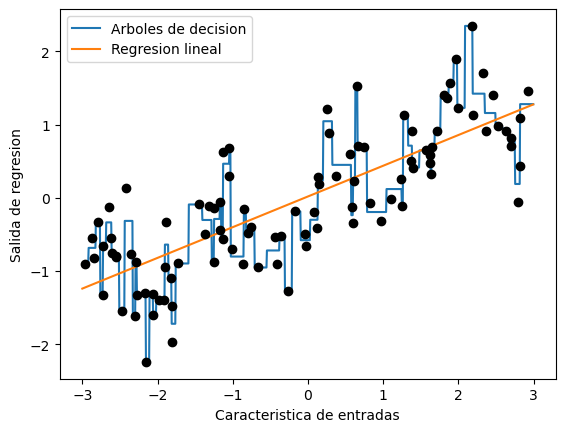

In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = hacer_wave(n_muestras=100)
linea = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.plot(linea, reg.predict(linea), label="Arboles de decision")
reg = LinearRegression().fit(X, y)
plt.plot(linea, reg.predict(linea), label="Regresion lineal")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Salida de regresion")
plt.xlabel("Caracteristica de entradas")
plt.legend(loc="best")

La figura muestra un conjunto de puntos (en negro) representando datos de un problema de regresión. La línea naranja corresponde a un modelo de regresión lineal, que intenta ajustar una única recta a los datos. Por otro lado, la línea azul representa un árbol de decisión, que divide el espacio de la característica en regiones y asigna un valor constante en cada una. Se observa que la regresión lineal capta una tendencia general con una sola pendiente, mientras que el árbol de decisión produce una aproximación escalonada más flexible, ajustándose localmente a los datos. Sin embargo, puede generar saltos abruptos.

#### Binning

Imaginamos una partición del rango de entrada para la característica (en este caso, los números de -3 a 3) en un número fijo de *bins* (contenedores), por ejemplo, 10. Cada punto de datos se representará según el contenedor al que pertenece. Para determinar esto, primero tenemos que definir los *bins*. En este caso, definiremos 10 intervalos igualmente espaciados entre -3 y 3. Utilizamos la función `np.linspace` para esto, creando 11 puntos que definen 10 *bins* (son los espacios entre dos límites consecutivos):

In [33]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


A continuación, determinamos a qué *bin* pertenece cada punto de datos. Esto se puede calcular fácilmente usando la función `np.digitize`:

In [35]:
bin_pertenece = np.digitize(X, bins=bins)
print("\nPuntos de datos:\n", X[:5])
print("\n*Bin* al que pertenecen los puntos de datos:\n", bin_pertenece[:5])


Puntos de datos:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

*Bin* al que pertenecen los puntos de datos:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


Lo que hicimos aquí fue transformar la única característica de entrada continua del conjunto de datos `wave` en una característica categórica que codifica en qué *bin* se encuentra cada punto de datos. 

Para usar un modelo de scikit‑learn en estos datos, transformamos esta característica discreta a una codificación *one‑hot* usando el `OneHotEncoder` del módulo `preprocessing`. Este codificador realiza una transformación similar a `pandas.get_dummies`, aunque actualmente solo funciona en variables categóricas que son enteras:

In [37]:
from sklearn.preprocessing import OneHotEncoder
# Transformamos usando OneHotEncoder.
# NOTA: En versiones recientes de scikit‑learn, el argumento 'sparse' ha sido reemplazado por 'sparse_output'
encoder = OneHotEncoder(sparse_output=False)
# encoder.fit encuentra los valores únicos que aparecen en bin_pertenece.
encoder.fit(bin_pertenece)
# transform crea la codificación one‑hot.
X_binned = encoder.transform(bin_pertenece)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Debido a que especificamos 10 *bins*, el conjunto de datos transformado `X_binned` ahora se compone de 10 características:

In [39]:
print("Dimensión de X_binned: {}".format(X_binned.shape))

Dimensión de X_binned: (100, 10)


Ahora construimos un nuevo modelo de regresión lineal y un modelo de árbol de decisión usando los datos codificados con *one‑hot*. El resultado se visualiza en la siguiente figura, junto con los límites de los contenedores:

Text(0.5, 0, 'Característica de entrada')

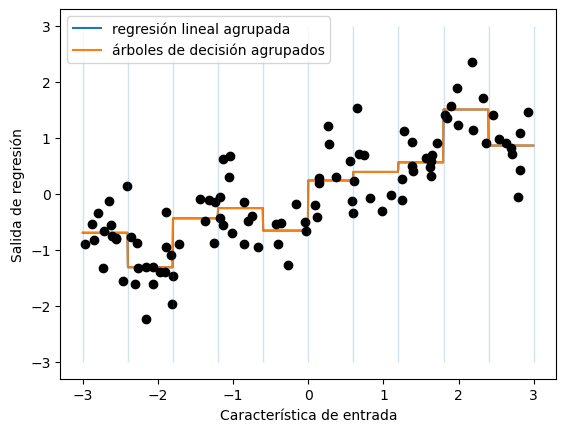

In [41]:
linea_binned = encoder.transform(np.digitize(linea, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(linea, reg.predict(linea_binned), label='regresión lineal agrupada')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(linea, reg.predict(linea_binned), label='árboles de decisión agrupados')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Salida de regresión")
plt.xlabel("Característica de entrada")

La línea punteada y la línea continua están exactamente una encima de la otra, lo que significa que el modelo de regresión lineal y el árbol de decisión hacen exactamente las mismas predicciones. Para cada contenedor, ambos modelos predicen un valor constante. Como las características son constantes dentro de cada contenedor, cualquier modelo debe predecir el mismo valor para todos los puntos dentro de un contenedor. Al comparar lo que los modelos aprendieron antes y después de agrupar las características, el modelo lineal se volvió mucho más flexible, ya que ahora tiene un valor diferente para cada contenedor, mientras que el modelo de árbol de decisión se volvió menos flexible.

Las transformaciones basadas en *bins* generalmente no aportan beneficios a los modelos basados en árboles, ya que estos pueden aprender a dividir los datos en cualquier punto. En cierto sentido, esto significa que los árboles de decisión pueden aprender agrupamientos que sean más útiles para la predicción. En cambio, el modelo lineal se benefició enormemente de la transformación de los datos.


### Interacciones y polinomios

Otra forma de enriquecer la representación de características, particularmente para modelos lineales, es agregar características de interacción y características polinómicas a partir de los datos originales. Este tipo de ingeniería de características se utiliza a menudo en el modelado estadístico, pero también es común en muchas aplicaciones prácticas de *machine learning*.

Como primer ejemplo, recordemos la figura anterior: el modelo lineal aprendió un valor constante para cada contenedor en el conjunto de datos `wave`. Sin embargo, sabemos que los modelos lineales pueden aprender no solo desplazamientos, sino también pendientes. Una forma de agregar una pendiente al modelo lineal sobre los datos agrupados es volver a incluir la característica original (el eje *x* en el gráfico). Esto conduce a un conjunto de datos de 11 dimensiones, como se muestra a continuación:

In [44]:
X_combinado = np.hstack([X, X_binned])
print(X_combinado.shape)

(100, 11)


Construimos el modelo de regresión lineal:

Text(0.5, 0, 'Característica de entrada')

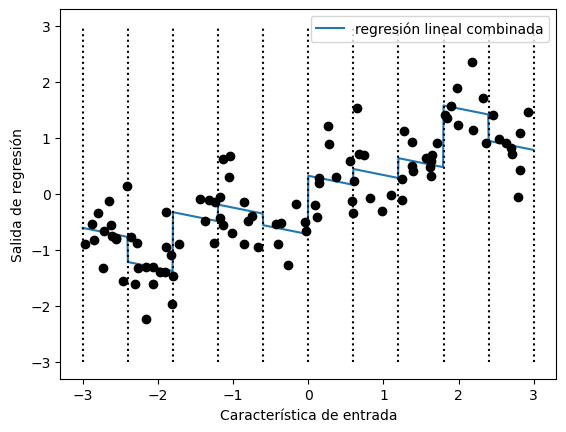

In [46]:
reg = LinearRegression().fit(X_combinado, y)
linea_combinada = np.hstack([linea, linea_binned])
plt.plot(linea, reg.predict(linea_combinada), label='regresión lineal combinada')

# Dibujamos las líneas verticales para cada límite de los bins
for b in bins:
    plt.plot([b, b], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')

plt.legend(loc="best")
plt.ylabel("Salida de regresión")
plt.xlabel("Característica de entrada")

En este ejemplo, el modelo aprendió un desplazamiento para cada contenedor, junto con una pendiente compartida entre todos ellos (ya que se utiliza una única característica *x*).

Sin embargo, dado que la pendiente se comparte entre todos los contenedores, no resulta muy útil. ¡Preferimos tener una pendiente separada para cada contenedor! Podemos lograr esto agregando una característica de interacción que combine el indicador del contenedor con la función original. Esta característica se obtiene como el producto entre el indicador del *bin* y la característica original. 

Creamos el siguiente conjunto de datos:

In [48]:
X_producto = np.hstack([X_binned, X * X_binned])
print(X_producto.shape)

(100, 20)


El conjunto de datos ahora tiene 20 características: los indicadores del *bin* y, para cada uno, el producto entre la característica original y dicho indicador. Se puede interpretar el producto como una copia separada de la función del eje *x* para cada contenedor.

Ajustamos un modelo de regresión lineal sobre estos datos:

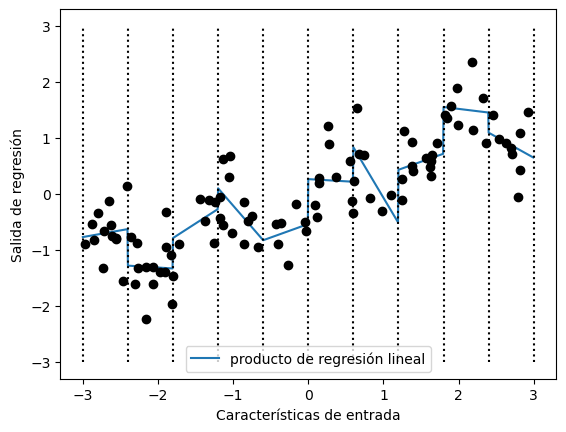

In [50]:
reg = LinearRegression().fit(X_producto, y)
linea_producto = np.hstack([linea_binned, linea * linea_binned])
plt.plot(linea, reg.predict(linea_producto), label='producto de regresión lineal')

# Dibujamos las líneas verticales correspondientes a los bins
for b in bins:
    plt.plot([b, b], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')

plt.ylabel("Salida de regresión")
plt.xlabel("Características de entrada")
plt.legend(loc="best")

Como puede verse, ahora cada contenedor tiene su propio desplazamiento y pendiente.

El uso de *binning* es una forma de expandir una característica continua. Otra estrategia es utilizar características polinómicas de la variable original. Para una característica `x`, podríamos incluir `x ** 2`, `x ** 3`, `x ** 4`, etc. Esto se implementa con `PolynomialFeatures` del módulo `preprocessing`:


In [53]:
from sklearn.preprocessing import PolynomialFeatures
# Incluimos polinomios hasta x ** 10.
# "include_bias=True" agrega una característica constante de valor 1.
polinomio = PolynomialFeatures(degree=10, include_bias=False)
polinomio.fit(X)
X_polinomio = polinomio.transform(X)

El uso de un grado de 10 produce 10 características:

In [55]:
print("Dimension de X_polinomio: {}".format(X_polinomio.shape))

Dimension de X_polinomio: (100, 10)


Comparemos algunas entradas de `X` y `X_polinomio`:

In [57]:
print("Entradas de X:\n{}".format(X[:5]))
print("Entradas de X_polinomio:\n{}".format(X_polinomio[:5]))

Entradas de X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entradas de X_polinomio:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


Podemos obtener la semántica de las nuevas características llamando al método `get_feature_names_out()`, que indica el exponente asociado a cada característica:

In [59]:
print("Nombres de características polinomiales:\n{}".format(polinomio.get_feature_names_out()))


Nombres de características polinomiales:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


El uso de características polinómicas junto con un modelo de regresión lineal produce el modelo clásico de regresión polinómica:

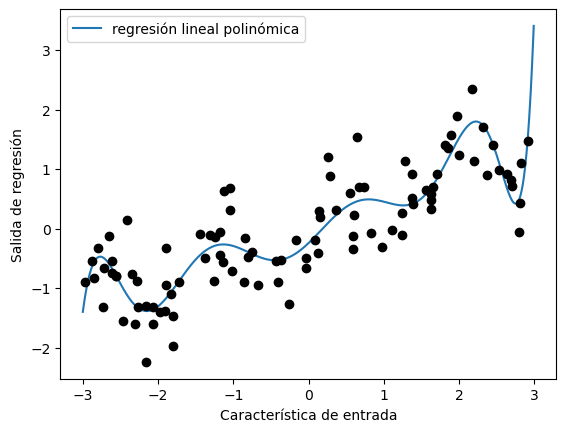

In [61]:
reg = LinearRegression().fit(X_polinomio, y)
linea_polinomio = polinomio.transform(linea)

plt.plot(linea, reg.predict(linea_polinomio), label='regresión lineal polinómica')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Salida de regresión")
plt.xlabel("Característica de entrada")
plt.legend(loc="best")

Como se observa, las características polinómicas producen un ajuste muy suave en esta información unidimensional, aunque polinomios de alto grado pueden comportarse de forma extrema en los límites o en zonas con pocos datos.

A modo de comparación, a continuación se entrena un modelo SVM con un kernel RBF sobre los datos originales, sin ninguna transformación explícita:

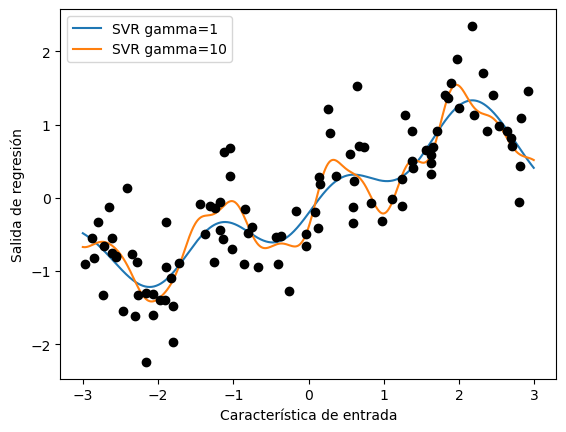

In [63]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(linea, svr.predict(linea), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Salida de regresión")
plt.xlabel("Característica de entrada")
plt.legend(loc="best")

Usando un modelo más complejo como el SVM, podemos aprender una predicción tan compleja como la de la regresión polinómica sin realizar una transformación explícita de las características.

### Ejemplo

Como una aplicación más realista de interacciones y polinomios, veamos el conjunto de datos de California Housing. Se construyen nuevas características (incluyendo interacciones y términos polinomiales) y se evalúa cuánto ayudan a mejorar el rendimiento del modelo. Primero se cargan los datos y se reescala cada característica para que esté entre 0 y 1 utilizando `MinMaxScaler`:


In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Cargar el conjunto de datos de California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0)

# Reescalar los datos
escalador = MinMaxScaler()
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)


Ahora se extraen características polinomiales e interacciones hasta un grado de 2:

In [68]:
from sklearn.preprocessing import PolynomialFeatures

# Se generan características polinomiales (incluyendo interacciones) hasta el grado 2
polinomio = PolynomialFeatures(degree=2).fit(X_entrenamiento_escalado)
X_entrenamiento_polinomio = polinomio.transform(X_entrenamiento_escalado)
X_prueba_polinomio = polinomio.transform(X_prueba_escalado)

print("Dimensión X_entrenamiento: {}".format(X_entrenamiento.shape))
print("Dimensión X_entrenamiento_polinomio: {}".format(X_entrenamiento_polinomio.shape))

Dimensión X_entrenamiento: (15480, 8)
Dimensión X_entrenamiento_polinomio: (15480, 45)


La correspondencia exacta entre las características de entrada y salida se puede obtener utilizando el método `get_feature_names_out()`

In [70]:
print("Nombres de caracteristicas polinomiales:\n{}".format(polinomio.get_feature_names_out()))

Nombres de caracteristicas polinomiales:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2']


A continuación, se compara el rendimiento de un modelo Ridge en los datos reescalados (sin interacciones) y en los datos transformados con interacciones polinomiales:

In [72]:
from sklearn.linear_model import Ridge

# Modelo Ridge sin interacciones
ridge = Ridge().fit(X_entrenamiento_escalado, y_entrenamiento)
print("Puntuación sin interacciones: {:.3f}".format(ridge.score(X_prueba_escalado, y_prueba)))

# Modelo Ridge con interacciones
ridge = Ridge().fit(X_entrenamiento_polinomio, y_entrenamiento)
print("Puntuación con interacciones: {:.3f}".format(ridge.score(X_prueba_polinomio, y_prueba)))

Puntuación sin interacciones: 0.584
Puntuación con interacciones: 0.605


Claramente, las interacciones y las características polinomiales proporcionan un buen impulso al rendimiento al usar Ridge. Sin embargo, al utilizar un modelo más complejo como un bosque aleatorio, la situación es algo diferente:

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_entrenamiento_escalado, y_entrenamiento)
print("Puntuación sin interacciones: {:.3f}".format(rf.score(X_prueba_escalado, y_prueba)))

rf = RandomForestRegressor(n_estimators=100).fit(X_entrenamiento_polinomio, y_entrenamiento)
print("Puntuación con interacciones: {:.3f}".format(rf.score(X_prueba_polinomio, y_prueba)))

Puntuación sin interacciones: 0.793
Puntuación con interacciones: 0.807


Se observa que, incluso sin características adicionales, el bosque aleatorio supera el rendimiento de Ridge; de hecho, agregar interacciones y polinomios puede disminuir ligeramente el rendimiento en este caso.

### Transformaciones no lineales univariadas

Hemos visto que agregar características cuadráticas o cúbicas puede ayudar a los modelos lineales en tareas de regresión. Existen, además, otras transformaciones útiles para determinadas características, en particular, aplicar funciones matemáticas como `log`, `exp` o `sin`.

Mientras que los modelos basados en árboles solo consideran el orden de las características, los modelos lineales y las redes neuronales son sensibles a la escala y distribución de cada variable. Si existe una relación no lineal entre la característica y el objetivo, resulta complicado modelarla sin una transformación adecuada.  
Las funciones `log` y `exp` pueden ayudar a ajustar la escala de los datos, mientras que `sin` y `cos` pueden ser útiles para patrones periódicos. La mayoría de los modelos funcionan mejor cuando las variables tienen una distribución similar a la gaussiana.

Un caso común en el que se aplica una transformación logarítmica es en datos de recuentos, por ejemplo, el número de accesos de un usuario. Las cuentas suelen ser enteras, nunca negativas y, a menudo, muy asimétricas.

#### Ejemplo

Utilizaremos un conjunto de datos artificiales de recuentos que presenta propiedades similares a las observadas en la práctica. En este ejemplo, las características son enteras y la respuesta es continua:


In [78]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

# Se generan recuentos (valores enteros positivos) a partir de una transformación exponencial
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Observamos las primeras 10 entradas de la primera característica. Todos son valores enteros y positivos; sin embargo, para apreciar la distribución resulta útil contar la frecuencia de cada valor:

In [80]:
print("Número de apariciones de la primera característica:\n{}".format(np.bincount(X[:, 0])))


Número de apariciones de la primera característica:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Visualizamos los recuentos en la siguiente figura:

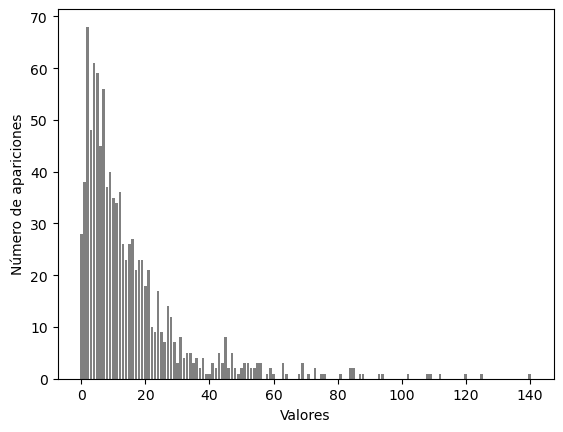

In [82]:
bins_val = np.bincount(X[:, 0])
plt.bar(range(len(bins_val)), bins_val, color='grey')
plt.ylabel("Número de apariciones")
plt.xlabel("Valores")
plt.show()

Tratemos de ajustar una regresión ridge a este modelo:

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0)
puntuacion = Ridge().fit(X_entrenamiento, y_entrenamiento).score(X_prueba, y_prueba)
print("Puntuación del conjunto de prueba (sin transformación): {:.3f}".format(puntuacion))

Puntuación del conjunto de prueba (sin transformación): 0.622


El puntaje $R^2$ relativamente bajo indica que Ridge no capta adecuadamente la relación entre `X` e `y`. Aplicar una transformación logarítmica puede ayudar, pero dado que `0` aparece en los datos y el logaritmo no está definido en cero, se calcula `log(X + 1)`:

In [86]:
X_entrenamiento_log = np.log(X_entrenamiento + 1)
X_prueba_log = np.log(X_prueba + 1)

Después de la transformación, la distribución de los datos es menos asimétrica y no presenta valores atípicos tan extremos. Por ejemplo, visualicemos el histograma de la primera característica transformada:

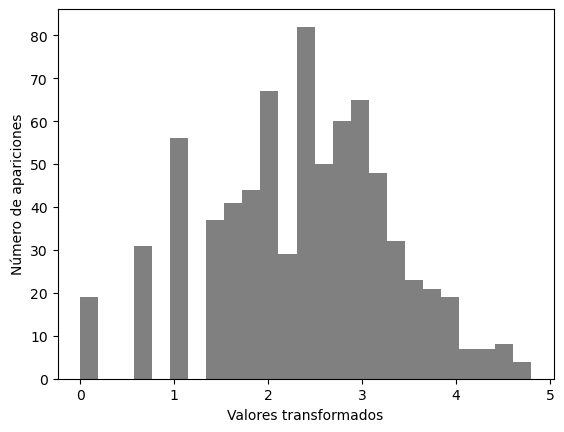

In [88]:
plt.hist(X_entrenamiento_log[:, 0], bins=25, color='gray')
plt.ylabel("Número de apariciones")
plt.xlabel("Valores transformados")
plt.show()

Finalmente, se ajusta nuevamente un modelo Ridge sobre los datos transformados:


In [90]:
puntuacion = Ridge().fit(X_entrenamiento_log, y_entrenamiento).score(X_prueba_log, y_prueba)
print("Puntuación del conjunto de prueba (con transformación logarítmica): {:.3f}".format(puntuacion))

Puntuación del conjunto de prueba (con transformación logarítmica): 0.875


Encontrar la transformación que mejor funcione para cada conjunto de datos y modelo es casi un arte. En este ejemplo, todas las características tienen propiedades similares, lo cual rara vez ocurre en la práctica; a menudo solo se transforma un subconjunto o cada característica se transforma de manera diferente.  
Cabe destacar que, mientras que estas transformaciones son esenciales para modelos lineales o redes neuronales, son irrelevantes para modelos basados en árboles. Además, en regresión puede ser útil transformar también la variable objetivo `y` (por ejemplo, mediante `log(y + 1)`), lo que se acerca a la idea de una regresión de Poisson desde un punto de vista probabilístico.

### Ejercicios

#### Ejercicio 1: Binning y codificación *one‑hot* en una variable continua

**Objetivo:**  
- Aplicar una transformación de *binning* sobre una variable continua.
- Codificar la variable agrupada mediante *one‑hot encoding*.
- Comparar el rendimiento de un modelo lineal y un árbol de decisión en la predicción de un objetivo.

**Tareas sugeridas:**

1. Selecciona o genera un conjunto de datos unidimensional (por ejemplo, una distribución normal o el dataset `wave` mencionado en el ejemplo).
2. Divide el rango de la variable en un número variable de *bins* (prueba con 5, 10 y 20 contenedores) utilizando `np.linspace` y `np.digitize`.
3. Transforma los *bins* a una codificación *one‑hot* usando `OneHotEncoder` (recuerda usar el parámetro `sparse_output=False` en versiones recientes).
4. Ajusta un modelo de regresión lineal y otro de árbol de decisión para predecir un objetivo (puede ser una función conocida o datos generados).
5. Visualiza y analiza cómo varía el ajuste y el rendimiento según el número de *bins* y el tipo de modelo.



#### Ejercicio 2: Transformaciones no lineales en datos de recuento

**Objetivo:**  
- Trabajar con un dataset simulado de recuentos que presenta alta asimetría.
- Evaluar el impacto de transformaciones no lineales (por ejemplo, `log`, raíz cuadrada, `exp`) sobre el rendimiento de modelos lineales.

**Tareas sugeridas:**

1. Genera un dataset sintético similar al ejemplo, donde las características se obtengan a partir de una distribución (por ejemplo, usando `np.random.poisson`).
2. Visualiza la distribución de las características (por ejemplo, con histogramas) para identificar la asimetría y la presencia de valores extremos.
3. Aplica distintas transformaciones no lineales sobre las características. Ten en cuenta que si hay ceros, deberás aplicar la transformación `log(X + 1)` o similar.
4. Ajusta un modelo de regresión (por ejemplo, Ridge) sobre los datos originales y sobre los datos transformados.
5. Compara y discute las diferencias en el rendimiento y la estabilidad del modelo.


#### Ejercicio 3: Pipeline para selección de transformación óptima

**Objetivo:**  
- Construir un *pipeline* en scikit‑learn que aplique diferentes transformaciones a las características.
- Usar GridSearchCV para determinar cuál transformación (o combinación de ellas) mejora la capacidad predictiva del modelo.

**Tareas sugeridas:**

1. Selecciona un dataset (puede ser un dataset real o sintético) que contenga características con distribuciones muy dispares.
2. Crea un pipeline que incluya:
   - La posibilidad de aplicar transformaciones como `log`, raíz cuadrada o ninguna.
   - Expansión polinómica opcional.
   - Un estimador (por ejemplo, Ridge o RandomForestRegressor).
3. Define una cuadrícula de parámetros que explore:
   - El tipo de transformación para cada característica (o grupo de características).
   - El grado de la expansión polinómica.
   - Parámetros del modelo final (por ejemplo, el parámetro de regularización en Ridge).
4. Usa GridSearchCV para encontrar la mejor combinación de transformaciones y parámetros.
5. Discute los resultados obtenidos y qué transformación resultó ser la más efectiva para cada tipo de característica.


#### Ejercicio 5: Interpretabilidad en modelos con interacciones y transformaciones

**Objetivo:**  
- Comparar la interpretabilidad de modelos lineales y modelos basados en árboles cuando se utilizan interacciones y transformaciones no lineales.
- Emplear técnicas de interpretación (por ejemplo, análisis de coeficientes o SHAP) para identificar las características más relevantes.

**Tareas sugeridas:**

1. Usa un dataset con múltiples variables y aplica interacciones (con `PolynomialFeatures`) y transformaciones (por ejemplo, logarítmica o raíz cuadrada).
2. Ajusta dos modelos:
   - Un modelo lineal (por ejemplo, Ridge) sobre las características transformadas.
   - Un modelo basado en árboles (por ejemplo, RandomForestRegressor) sobre las mismas características.
3. Para el modelo lineal, analiza los coeficientes para identificar qué interacciones y transformaciones tienen mayor peso.
4. Para el modelo basado en árboles, utiliza herramientas de interpretabilidad como SHAP o la importancia de características incorporada.
5. Realiza un informe comparativo sobre qué características transformadas resultan ser más relevantes en cada modelo y discute posibles razones.


#### Ejercicio 6: Características polinomiales en redes neuronales

**Objetivo:**  
Explorar el efecto de ampliar el espacio de características con términos polinomiales en una red neuronal para un problema de regresión.

**Pasos sugeridos:**

1. **Carga y preprocesamiento:**  
   Utiliza un dataset clásico (por ejemplo, Boston Housing o California Housing). Escala los datos usando un escalador como `MinMaxScaler` o `StandardScaler`.

2. **Generación de características polinomiales:**  
   Usa `PolynomialFeatures` (por ejemplo, con grado 2 o 3) para crear interacciones y términos no lineales.  
   ```python
   from sklearn.preprocessing import PolynomialFeatures
   polinomio = PolynomialFeatures(degree=2, include_bias=False)
   X_entrenamiento_poly = polinomio.fit_transform(X_entrenamiento_escalado)
   X_prueba_poly = polinomio.transform(X_prueba_escalado)
   ```

3. **Diseño de la red neuronal:**  
   Con frameworks como Keras o PyTorch, diseña una red neuronal (por ejemplo, con dos o tres capas densas) y entrena dos modelos:  
   - Uno utilizando las características originales.  
   - Otro utilizando las características expandidas con términos polinomiales.

4. **Comparación y análisis:**  
   - Evalúa el desempeño (por ejemplo, con el coeficiente $R^2$ o MSE) en el conjunto de prueba.  
   - Analiza si el aumento de dimensiones mejora la capacidad predictiva o induce sobreajuste.  
   - Experimenta con técnicas de regularización (dropout, L2) para mitigar posibles efectos adversos.


#### Ejercicio 7: Transformaciones no lineales en datos de recuento para redes neuronales

**Objetivo:**  
Investigar cómo afectan las transformaciones no lineales (como logarítmica, exponencial o trigonométrica) al entrenamiento de una red neuronal cuando se trabaja con datos de recuento.

**Pasos sugeridos:**

1. **Generación del dataset:**  
   Crea un conjunto de datos artificiales en el que las características provengan de distribuciones de recuentos (por ejemplo, usando `np.random.poisson`).

2. **Visualización de la distribución:**  
   Utiliza histogramas para visualizar la distribución original y detectar asimetrías o presencia de valores extremos.

3. **Aplicación de transformaciones:**  
   - Aplica la transformación logarítmica ajustada (por ejemplo, `np.log(X + 1)`) para evitar problemas con ceros.  
   - Alternativamente, prueba otras transformaciones (por ejemplo, raíz cuadrada o incluso funciones seno en caso de datos periódicos).

4. **Entrenamiento de la red neuronal:**  
   Diseña y entrena una red neuronal simple para un problema de regresión o clasificación, comparando el desempeño con datos originales versus datos transformados.

5. **Análisis de resultados:**  
   Discute cómo la transformación afecta la convergencia, la estabilidad numérica y la capacidad de la red para modelar relaciones complejas.


#### Ejercicio 8: Uso de binning y codificación one-hot como entrada para redes neuronales

**Objetivo:**  
Evaluar el impacto de transformar una variable continua en una representación categórica (usando binning y codificación one-hot) antes de alimentar una red neuronal.

**Pasos sugeridos:**

1. **Binning:**  
   Selecciona una característica continua de un dataset y define intervalos (por ejemplo, utilizando `np.linspace` y `np.digitize`).

2. **Codificación One-Hot:**  
   Transforma los bins en variables dummy utilizando `OneHotEncoder` (recordando utilizar el argumento adecuado, por ejemplo, `sparse_output=False` en versiones recientes de scikit‑learn).

3. **Diseño de la red neuronal:**  
   - Entrena una red neuronal con la característica original.  
   - Entrena otra red neuronal en la que la entrada se compone de la codificación one-hot del bin (o incluso, combina ambas representaciones).

4. **Comparación:**  
   - Evalúa métricas de desempeño y discute las ventajas y desventajas de representar la variable como continua versus categórica.  
   - Reflexiona sobre la pérdida de orden o la potencial ganancia en flexibilidad del modelo.


#### Ejercicio 9: Creación de una capa personalizada para transformaciones de características

**Objetivo:**  
Implementar una capa personalizada en PyTorch que aplique una transformación no lineal o un mapeo polinómico a las entradas antes de pasarlas a las capas densas, y comparar el desempeño con una arquitectura tradicional.

**Pasos sugeridos:**

1. **Definición de la capa personalizada:**  
   Crea una clase de capa que reciba la entrada y realice, por ejemplo, una transformación polinómica o una combinación de funciones (log, exp, sin).

2. **Integración en la red:**  
   Inserta esta capa al inicio de la red neuronal. El resto de la arquitectura puede ser estándar (varias capas densas, activaciones ReLU, etc.).

3. **Entrenamiento y evaluación:**  
   - Compara el rendimiento del modelo con la capa personalizada frente a un modelo similar sin dicha capa.  
   - Analiza la interpretabilidad de las transformaciones aprendidas y si la red aprovecha mejor las relaciones no lineales.

4. **Discusión:**  
   Reflexiona sobre cuándo y por qué podría ser útil incorporar transformaciones explícitas en la arquitectura de una red, en contraposición a dejar que la red aprenda dichas transformaciones de manera implícita.


#### Ejercicio 10: Interpretabilidad y análisis de importancia de características transformadas

**Objetivo:**  
Utilizar métodos de interpretabilidad (por ejemplo, LIME o SHAP) para entender cómo influyen las características transformadas (polinomiales, interacciones o transformaciones logarítmicas) en las predicciones de una red neuronal.

**Pasos sugeridos:**

1. **Entrenamiento del modelo:**  
   Entrena una red neuronal utilizando características originales y, por separado, características transformadas (por ejemplo, características polinomiales o combinaciones con transformaciones logarítmicas).

2. **Aplicación de técnicas interpretables:**  
   Emplea herramientas como SHAP para analizar la contribución de cada característica en la predicción de la red.  
   - Compara la importancia relativa de las variables originales y las transformadas.  
   - Observa si algunas de las transformaciones aportan información redundante o, por el contrario, resaltan patrones no evidentes en los datos originales.

3. **Reporte de hallazgos:**  
   Elabora un informe en el que discutas cómo varía la importancia de las características según la transformación aplicada, y cómo esto se relaciona con el desempeño del modelo.



In [93]:
## Tus respuestas